# Homework 5 
### Tristan Larkin
### (Due Date: Monday, Mar. 06) 

## Problem 1
The initial activity $𝑁_0$ and lifetime 𝜏 of a radioactive source are known with an uncertainty of 1% each, 
$\frac{\sigma_{N_0}}{N_0}=\frac{\sigma_{\tau}}{\tau}=1\%$. The activity at any later time $t$ is:  
$$ N(𝑡)=N_0e^{−t/ \tau} $$  
(a) Find the error in terms of $t$, activity $N_0$ and $\tau$.  \
(b) For what value of ($t/\tau$) do the errors in $N_0$ and $\tau$ contribute equally to the uncertainty in $𝑁(𝑡)$? 

(a) We know that the error in $N$ will be given by the equation:
$$ \sigma_N (t) = \sqrt{(\frac{\partial N}{\partial N_0} \sigma_{N_0})^2+
                        (\frac{\partial N}{\partial \tau} \sigma_{\tau})^2+
                        (\frac{\partial N}{\partial t} \sigma_{t})^2}$$
$$ \sigma_N (t) = \sqrt{(\sigma_{N_0}e^{-t/\tau})^2+
                        (\frac{t \sigma_{\tau} N_0}{\tau^2} e^{-t/\tau})^2+
                        (\frac{-\sigma_{t} N_0}{\tau} e^{-t/\tau})^2}$$

If we take $t$ to be an exact value we are left with:
$$ \sigma_N (t) = \sqrt{(\sigma_{N_0}e^{-t/\tau})^2+
                        (\frac{t \sigma_{\tau} N_0}{\tau^2} e^{-t/\tau})^2}$$

(b) we want to satisfy the equation:
$$ (\sigma_{N_0}e^{-t/\tau})^2 = (\frac{t \sigma_{\tau} N_0}{\tau^2} e^{-t/\tau})^2$$
$$ \sigma_{N_0} = \frac{t \sigma_{\tau} N_0}{\tau^2}$$
$$ \frac{\sigma_{N_0}}{N_0} \frac{\tau}{\sigma_{\tau}} = \frac{t}{\tau}$$
By the percent uncertainty
$$ \frac{0.01}{0.01} = \frac{t}{\tau}$$
$$ 1 = \frac{t}{\tau}$$

## Problem 2.- (Bevington 4.8)
The Particle Data Tables list the following eight experimental measurements of the mean lifetime of the $K$ meson with their uncertainties, in units of $10^{-10}$ s. Find the weighted mean of the data and the uncertainty in the mean.

We can use the equations:
$$ w_i = \frac{1}{\sigma_i^2} $$
$$ x_{\text{avg}} = \frac{\sum w_i x_i}{\sum w_i} $$
$$ \sigma_{\text{avg}} = \sum\sqrt{\frac{1}{w_i}} $$

In [18]:
import numpy as np

values = [0.8971,0.8941,0.8929,0.8920,0.881,0.8924,0.8937,0.8958]
uncertainties = [0.0021,0.0014,0.0016,0.0044,0.009,0.0032,0.0048,0.0045]

def weighted_mean(xs:list[float], sigmaxs:list[float]) -> float:
    weights = [1/(sigma**2) for sigma in sigmaxs]
    num = sum([w*x for w,x in zip(weights, xs)])
    den = sum(weights)
    return num/den

def weighted_uncertainty(sigmaxs:list[float]) -> float:
    weights = [1/(sigma**2) for sigma in sigmaxs]
    den = sum(weights)
    return np.sqrt(1/den)

for x, sig in zip(values, uncertainties):
    print(f"{x} ± {sig}")

wavg = weighted_mean(values, uncertainties)
avgunc = weighted_uncertainty(uncertainties)
print()
print(f"The weighted mean is {wavg:.3} ± {avgunc:.2} 10^(-10) s.")

0.8971 ± 0.0021
0.8941 ± 0.0014
0.8929 ± 0.0016
0.892 ± 0.0044
0.881 ± 0.009
0.8924 ± 0.0032
0.8937 ± 0.0048
0.8958 ± 0.0045

The weighted mean is 0.894 ± 0.00085 10^(-10) s.


## Problem 3.- (Bevington 4.9) 
Eleven students in an undergraduate laboratory combined their measurements of the mean lifetime of an excited state. Their individual measurements are tabulated. Estimates of Mean and Errors are tabulated:

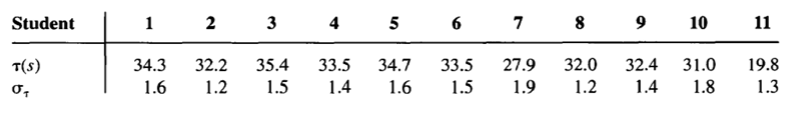

Find the maximum likelihood estimate of the mean and its uncertainty. 

In [9]:
taus = [34.3, 32.2, 35.4, 33.5, 34.7, 33.5, 27.9, 32.0, 32.4, 31.0, 19.8]
sigma_taus = [1.6, 1.2, 1.5, 1.4, 1.6, 1.5, 1.9, 1.2, 1.4, 1.8, 1.3]

I will use the same functions as in Problem 2.

In [16]:
avg = weighted_mean(taus, sigma_taus)
avg_unc = weighted_uncertainty(sigma_taus)

print(f"The average value of tau is {avg:.3} ± {avg_unc:.2} s.")

The average value of tau is 31.3 ± 0.44 s.


## Problem 4
In an experiment to determine the energy of a gamma ray source, an experimenter makes $N_1$=44 measurements with the apparatus and finds a result $\bar{E}_1$ = 1.022 MeV with a spread $s_1$= 0.010 MeV in the observations. After looking over the data the experimenter realizes that he could improve the equipment to decrease the uncertainty by a factor of 2.5 ($s_2$ = 0.004 MeV) so he makes $N_2$=12 more measurements that yield a result $\bar{E}_2$ = 1.018 MeV. 

(a) What is the uncertainty in the mean $\bar{E}_1$ in the first set? \
(b) What is the uncertainty in the mean $\bar{E}_2$ in the second set? 

(Hint: we can approximate the uncertainty in each of the “$N_i$” measurements as the uncertainty given by the spread of the particular set.)

(c) If he wishes to combine the measurements, calculate the mean and the uncertainty in the mean of the combined measurements? 

If we take the spead to be the uncertainty of each value, we can combine the uncertainties to get the uncertainty of the averages $\bar{E}_1$ and $\bar{E}_2$. I will use the same funciton defined above.

In [32]:
N1 = 44 # measurments
N2 = 12 # measurments

e1 = 1.022 # MeV
e2 = 1.018 # MeV

s1 = 0.010 # MeV
s2 = 0.004 # MeV

uncertainties1 = [s1] * N1
uncertainties2 = [s2] * N2

sigma1 = weighted_uncertainty(uncertainties1)
sigma2 = weighted_uncertainty(uncertainties2)

print(f"(a) The uncertainty for E1 is {sigma1:.2}")
print(f"(b) The uncertainty for E2 is {sigma2:.2}")

(a) The uncertainty for E1 is 0.0015
(b) The uncertainty for E2 is 0.0012


Now we can use the functions again to combine these values.

In [33]:
e_avg = weighted_mean([e1,e2], [sigma1,sigma2])
sigma_avg = weighted_uncertainty([sigma1,sigma2])

print(f"(c) The average E is going to be {e_avg:.4} ± {sigma_avg:.2}")

(c) The average E is going to be 1.019 ± 0.00092
